In [1]:
import coeficients
import cmeans_math.data_loads as data_loads
import cmeans_math.data_preprocessing as dp

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./data/glass/glass.data', names=['num', 'param_0', 'param_1', 'param_2', 'param_3', 'param_4', 'param_5',
                                                   'param_6', 'param_7', 'param_8', 'class'])
data.head()

,num,param_0,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
X = np.array(data[['param_0', 'param_1', 'param_2', 'param_3', 'param_4', 'param_5',
                   'param_6', 'param_7', 'param_8']])

In [5]:
X = np.array(dp.get_updated_data_set(X))
X

array([[-0.13432836, -0.12481203,  1.        , ..., -0.38289963,
        -1.        , -1.        ],
       [-0.43283582, -0.04962406,  0.60356347, ..., -0.55390335,
        -1.        , -1.        ],
       [-0.55838455, -0.15789474,  0.58129176, ..., -0.56319703,
        -1.        , -1.        ],
       ...,
       [-0.16593503,  0.09172932, -1.        , ..., -0.44052045,
         0.04126984, -1.        ],
       [-0.52941176,  0.09774436, -1.        , ..., -0.4330855 ,
        -0.0031746 , -1.        ],
       [-0.47673398,  0.05263158, -1.        , ..., -0.4070632 ,
         0.06031746, -1.        ]])

In [6]:
fsi = []
pc = []
pec = []
pcaes = []
mah = []
mah_inv = []
klc = []

In [7]:
min_cluster_count = 1
max_cluster_count = 20

In [8]:
for i in range(min_cluster_count, max_cluster_count + 1):
    cmeans_tst = coeficients.FCM_coef(mat_X=X, n_clusters=i, max_iter=300, random_state=1)
    cmeans_tst.fit()
    fsi.append(cmeans_tst.fukuyama_sugeno_index)
    pc.append(cmeans_tst.partition_coefficient)
    pec.append(cmeans_tst.partition_entropy_coefficient)
    pcaes.append(cmeans_tst.partition_coef_exp_sep)
    mah.append(cmeans_tst.mahalanobis_coefficient)
    mah_inv.append(cmeans_tst.mahalanobis_inverse_coefficient)
    klc.append(cmeans_tst.kulback_leibler_coefficient)
    print('Tested clusters:', i)

Tested clusters: 1
Tested clusters: 2
Tested clusters: 3
Tested clusters: 4
Tested clusters: 5
Tested clusters: 6
Tested clusters: 7
Tested clusters: 8
Tested clusters: 9
Tested clusters: 10
Tested clusters: 11
Tested clusters: 12
Tested clusters: 13
Tested clusters: 14
Tested clusters: 15
Tested clusters: 16
Tested clusters: 17
Tested clusters: 18
Tested clusters: 19
Tested clusters: 20


In [9]:
res_coefs = pd.DataFrame()
res_coefs['fsi'] = np.array(fsi)
res_coefs['pc'] = np.array(pc)
res_coefs['pec'] = np.array(pec)
res_coefs['pcaes'] = np.array(pcaes)
res_coefs['mah'] = np.array(mah)
res_coefs['mah_inv'] = np.array(mah_inv)
res_coefs['klc'] = np.array(klc)

In [10]:
res_coefs

,fsi,pc,pec,pcaes,mah,mah_inv,klc
0,229.456909,1.000000,-0.000000,0.000000e+00,2.386606,2.386606,0.000000
1,552.359192,0.782754,0.516178,1.495100e+03,2.480527,3.331942,-92.602943
2,543.765564,0.610587,0.971040,3.186042e+05,2.474509,4.219063,-75.886734
3,-57.249611,0.578600,1.153190,2.945725e+05,2.483625,4.723591,-74.679375
4,1079.889893,0.515288,1.399139,6.762001e+04,2.491069,5.267598,-62.419563
5,-53.787140,0.418556,1.709632,9.671139e+04,2.485368,6.101960,-49.501675
6,290.635529,0.380794,1.878700,1.234587e+05,2.563184,6.909602,-44.183735
7,-30.855228,0.376349,1.949157,3.616086e+05,2.487961,6.937977,-44.409367
8,-55.230194,0.366363,2.057014,5.559279e+05,2.470587,7.079978,-40.462967
9,289.464050,0.352962,2.143739,1.297814e+06,2.455197,7.621487,-39.131691


In [11]:
res_coefs.to_csv('./data/results/glass_res.csv')

In [12]:
def plot_res(x, y, x_label, y_label, title):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
res_coefs = pd.read_csv('./data/results/glass_res.csv')

In [15]:
res_coefs.head()

,Unnamed: 0,fsi,pc,pec,pcaes,mah,mah_inv,klc
0,0,229.45691,1.000000,-0.000000,0.000000,2.386606,2.386606,0.000000
1,1,552.35920,0.782754,0.516178,1495.100220,2.480527,3.331942,-92.602940
2,2,543.76556,0.610587,0.971040,318604.156250,2.474509,4.219063,-75.886734
3,3,-57.24961,0.578600,1.153190,294572.468750,2.483625,4.723591,-74.679375
4,4,1079.88990,0.515288,1.399139,67620.007812,2.491069,5.267598,-62.419563


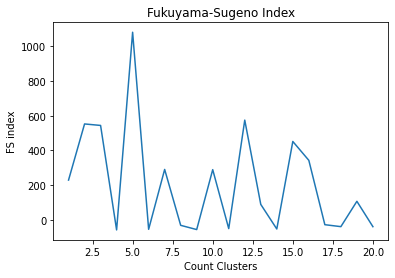

In [16]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['fsi'],
         x_label='Count Clusters', y_label='FS index', title='Fukuyama-Sugeno Index')

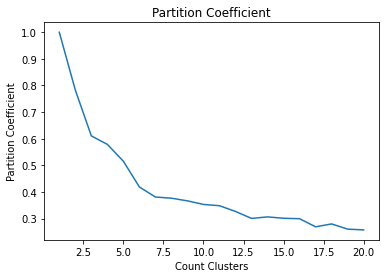

In [17]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['pc'],
         x_label='Count Clusters', y_label='Partition Coefficient', title='Partition Coefficient')

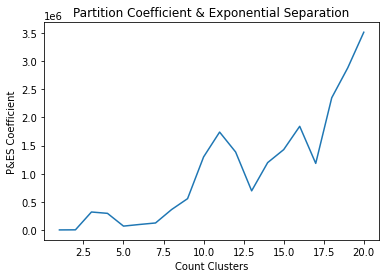

In [18]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['pcaes'],
         x_label='Count Clusters', y_label='P&ES Coefficient', title='Partition Coefficient & Exponential Separation')

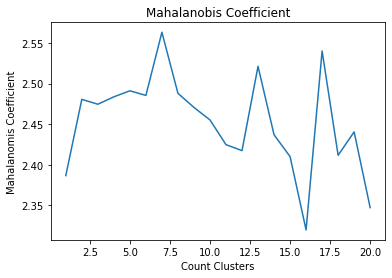

In [19]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['mah'],
         x_label='Count Clusters', y_label='Mahalanomis Coefficient', title='Mahalanobis Coefficient')

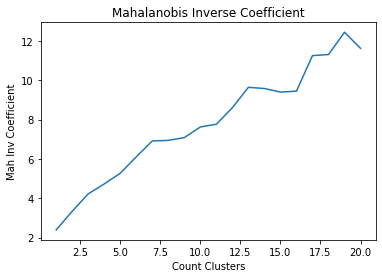

In [20]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['mah_inv'],
         x_label='Count Clusters', y_label='Mah Inv Coefficient', title='Mahalanobis Inverse Coefficient')

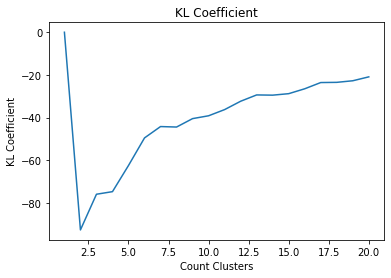

In [21]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['klc'],
         x_label='Count Clusters', y_label='KL Coefficient', title='KL Coefficient')